In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_studentper = pd.read_csv("/content/StudentsPerformance.csv")
data_studentper.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data_studentper["Percentage"]=(data_studentper["math score"]+data_studentper["reading score"]+data_studentper["writing score"])/3
print(data_studentper["Percentage"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [7]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

data_studentper["grade"] = data_studentper.apply(lambda x : Grade(x["Percentage"]),axis=1)
data_studentper.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


In [ ]:
# Visulaization of data and searching for better in the visualization

<ipython-input-8-10ee2a1828e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='gender', y ='Percentage', data = data_studentper,


<Axes: xlabel='gender', ylabel='Percentage'>

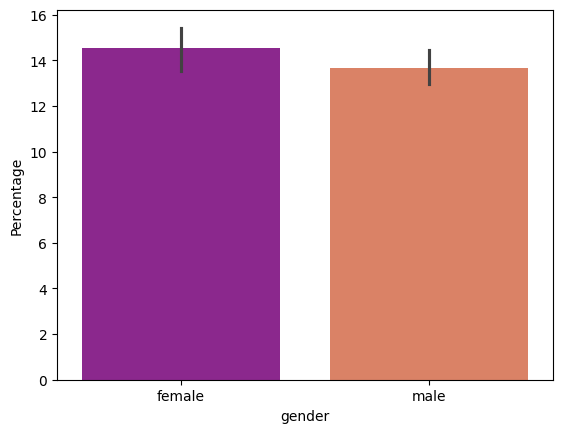

In [8]:
sns.barplot(x ='gender', y ='Percentage', data = data_studentper,
            palette ='plasma', estimator = np.std)

In [9]:
data_studentper['gender'].value_counts()

,count
gender,
female,518
male,482


In [10]:
lunchCount = data_studentper['lunch'].value_counts()
print(lunchCount)

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


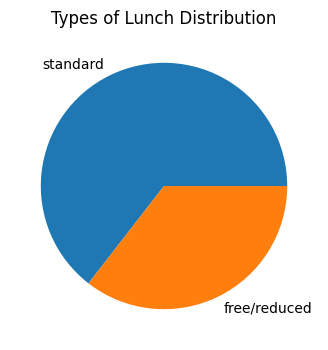

In [11]:
plt.figure(figsize=(4,4))
plt.pie(lunchCount, labels=lunchCount.index)
plt.title("Types of Lunch Distribution")
plt.savefig("/content/StudentsPerformance1.png")
plt.show()

In [12]:
# Below countplot illustares the grade secured by female and male

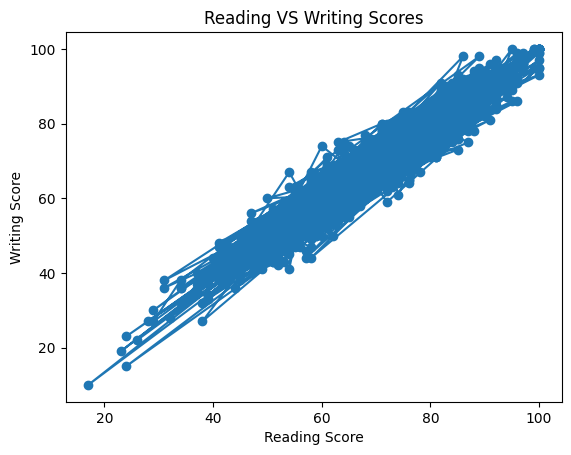

In [17]:
plt.plot(data_studentper['reading score'], data_studentper['writing score'], marker='o')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading VS Writing Scores')
plt.savefig("/content/StudentsPerformance2.png")
plt.show()

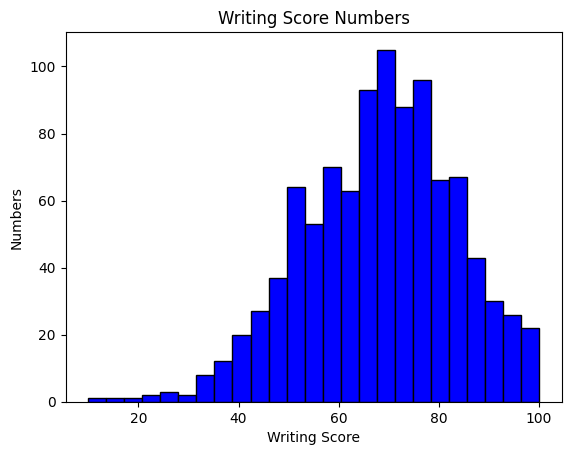

In [19]:
# Histogram of the StudentPerformance
plt.hist(data_studentper['writing score'], bins=25, color='blue',edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Numbers')
plt.title("Writing Score Numbers")
plt.savefig("/content/StudentsPerformance3.png")
plt.show()

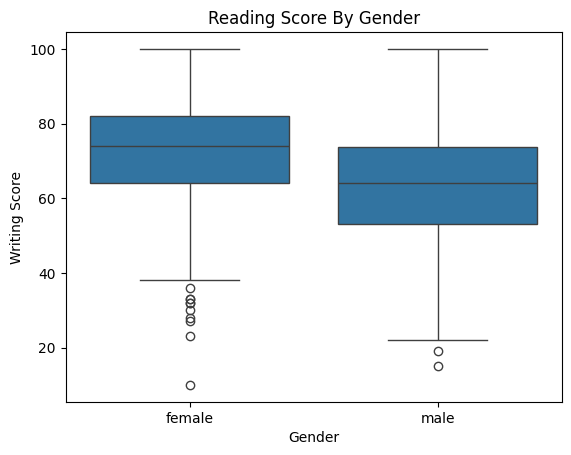

In [20]:
# Boxplot of the StudentPerformance
sns.boxplot(x='gender', y='writing score', data=data_studentper)
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.title("Reading Score By Gender")
plt.savefig("/content/StudentsPerformance4.png")
plt.show()

<ipython-input-22-846b672b2a61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(data_studentper['Percentage'], kde = False, color ='red', bins = 20)


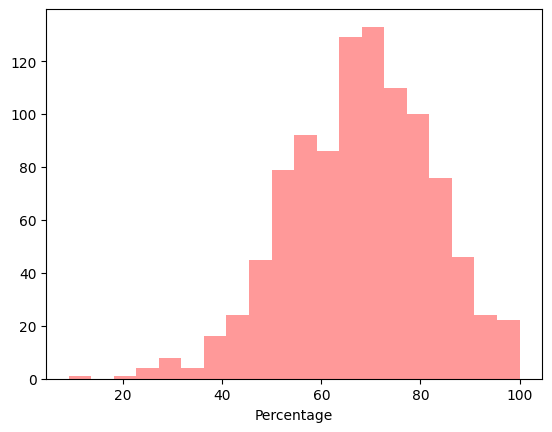

In [22]:
ax=sns.distplot(data_studentper['Percentage'], kde = False, color ='red', bins = 20)
fig=ax.get_figure()
fig.savefig("/content/StudentsPerformance5.png")

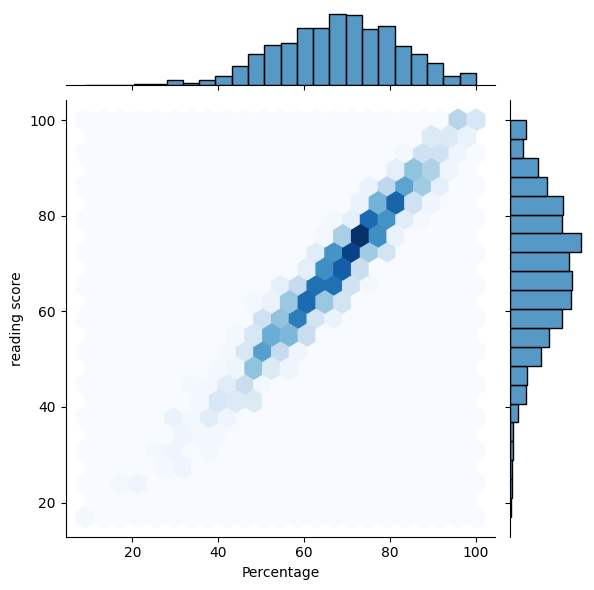

In [23]:
ax = sns.jointplot(x='Percentage', y='reading score', data=data_studentper, kind='hex', cmap='Blues')
plt.savefig("/content/StudentsPerformance6.png")
plt.show()

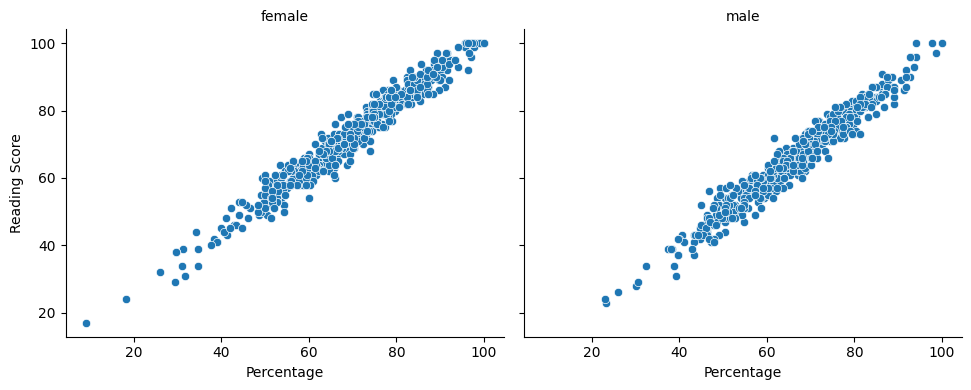

In [24]:
g = sns.FacetGrid(data_studentper, col='gender', col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, 'Percentage', 'reading score')
g.set_axis_labels('Percentage', 'Reading Score')
g.set_titles(col_template='{col_name}')

# After all of the visualisations has been done i found better one is the Pie Chart plot Visualization - Which is easy to see the visualization between two types of columns, But also all the visualizations has there own understanding od data analysis as per the type we need.